**Muhammad Andrianto Abdillah**

- **Devalopa**

# Student Activity
Lakukan proses di atas menggunakan dataset review product https://drive.google.com/file/d/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF/view?usp=sharing

! Ingat <br>
Kolom Ratings adalah target anda.

Tugas Anda:
- mahasiswa ditugaskan untuk menemukan model terbaik. Mahasiswa bisa menggunakan algoritme supervised learning lainnya 

Setelah dikerjakan, buatlah resume berdasarkan pengalaman Anda dalam membuat model ML dan proses evaluasinya

Kumpulkan tugas Anda pada: https://s.id/tugas-nlp-ofa



# Pre Processing

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle

%matplotlib inline

In [135]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [136]:
!pip -q install sastrawi

# Data Acquisition

Penjelasan Label Rating
* 0:  
* 1:  
* 2: 

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/20191002-reviews.csv')

data.head(10)

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02
5,100002528,beli-harddisk-eksternal,Deden,5,NaN,NaN,NaN,0,0,0,True,16.01,02 Nov 2017,androidApp,2019-10-02
6,100002528,beli-harddisk-eksternal,Yeana,5,NaN,NaN,NaN,0,0,0,True,13.01,25 Sep 2017,mobile,2019-10-02
7,100002528,beli-harddisk-eksternal,nurfarida,1,NaN,ada pengirimn ntb bima,bima,4,4,0,True,7.22,NaN,androidApp,2019-10-02
8,100003785,beli-harddisk-eksternal,Fadjar B.,1,NaN,NaN,baru 10 bulan layarnya dah bergaris,0,0,0,True,21.49,06 Apr 2017,androidApp,2019-10-02
9,100003785,beli-harddisk-eksternal,agung p.,5,NaN,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...",0,0,0,True,19.50,01 Mar 2017,mobile,2019-10-02


In [139]:
df = data[['rating','reviewContent']]
df.head(10)

,rating,reviewContent
0,5,bagus mantap dah sesui pesanan
1,4,"Bagus, sesuai foto"
2,5,okkkkk mantaaaaaaapppp ... goood
3,4,bagus sesuai
4,5,NaN
5,5,NaN
6,5,NaN
7,1,bima
8,1,baru 10 bulan layarnya dah bergaris
9,5,"Pesan rabu sore,minggu sore sampe,,barang sesu..."


In [140]:
df.tail(10)

,rating,reviewContent
203777,5,NaN
203778,4,NaN
203779,1,Kalo kirim ke kupang bisa gak?
203780,5,Wkwkwk
203781,1,seller incapable to keep his product page clea...
203782,5,barang bagus dengan harga kompetitif
203783,3,NaN
203784,5,NaN
203785,3,Ok.thank lazada Pagi order sore barang nyampe ...
203786,5,"semua fitur berfungsi,harganya cukup murah. AK..."


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   rating         203787 non-null  int64 
 1   reviewContent  107029 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [142]:
print('Total Jumlah review:', df.shape[0], 'data\n')
print('terdiri dari (rating):')
print('-- [1] rating 1\t:', df[df.rating == 1].shape[0], 'data')
print('-- [2] rating 2\t:', df[df.rating == 2].shape[0], 'data')
print('-- [3] rating 3\t:', df[df.rating == 3].shape[0], 'data')
print('-- [4] rating 4\t:', df[df.rating == 4].shape[0], 'data')
print('-- [5] rating 5\t:', df[df.rating == 5].shape[0], 'data\n')

Total Jumlah review: 203787 data

terdiri dari (rating):
-- [1] rating 1	: 9749 data
-- [2] rating 2	: 3382 data
-- [3] rating 3	: 7073 data
-- [4] rating 4	: 17567 data
-- [5] rating 5	: 166016 data



In [143]:
height = df['rating'].value_counts()
height

5    166016
4     17567
1      9749
3      7073
2      3382
Name: rating, dtype: int64

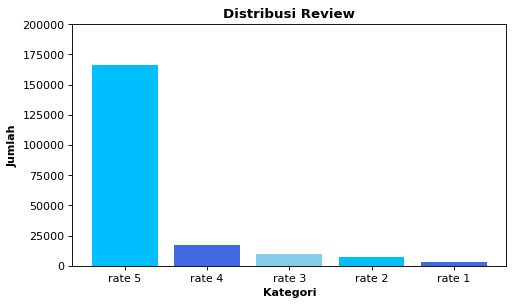

In [144]:
height = df['rating'].value_counts()
labels = ('rate 5', 'rate 4', 'rate 3', 'rate 2', 'rate 1')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,200000)
plt.title('Distribusi Review', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)
plt.show()

**Case** folding

In [145]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = str(text)
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [146]:
data['reviewContent'].iloc[9:20]

9     Pesan rabu sore,minggu sore sampe,,barang sesu...
10                                                  NaN
11           Mau tanya ini cicilnya pake apa ya,cc bkn?
12                Apakah TV. Tsb. Suda ada anti gores..
13    Pengirim barang tidak sesuai janji. Katanya ex...
14                                          Kualitas ok
15    Bagaimana tv LED saya merek Sharp 24 hitam LC ...
16        Pengiriman super lama.. tapi datang juga sich
17    ok barang sampai dengan Baik.. smoga terus di ...
18                                                  NaN
19                                                  NaN
Name: reviewContent, dtype: object

In [147]:
raw_sample = data['reviewContent'].iloc[15]
case_folding = casefolding(raw_sample)

In [148]:
print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  Bagaimana tv LED saya merek Sharp 24 hitam LC 24LE170i sekarang mati total baru 2 bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya ,, so,alnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih!!!
Case folding	:  bagaimana tv led saya merek sharp  hitam lc lei sekarang mati total baru  bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya  soalnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih


Word Normalization

In [149]:
# Download corpus singkatan
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-04-02 17:22:10--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv.2’

key_norm.csv.2      100%[===================>]  79.07K  --.-KB/s    in 0.01s   

2022-04-02 17:22:10 (6.14 MB/s) - ‘key_norm.csv.2’ saved [80969/80969]



In [150]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

In [151]:
key_norm

,_id,singkat,hasil
0,1,abis,habis
1,2,accent,tekanan
2,3,accept,terima
3,4,accident,kecelakaan
4,5,achievement,prestasi
...,...,...,...
3715,3716,ywdah,ya sudah
3716,3717,ywdh,ya sudah
3717,3718,ywdhlh,ya sudahlah
3718,3719,ywis,ya sudah


In [152]:
#text_normalize(i for i in list(df['reviewContent'].iloc[10]))

Filtering (Stopword Removal)

In [153]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [154]:
len(stopwords_ind)

758

In [155]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['lazada']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [156]:
raw_sample = df['reviewContent'].iloc[15]
raw_sample

'Bagaimana tv LED saya merek Sharp 24 hitam LC 24LE170i sekarang mati total baru 2 bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya ,, so,alnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih!!!'

In [157]:
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  Bagaimana tv LED saya merek Sharp 24 hitam LC 24LE170i sekarang mati total baru 2 bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya ,, so,alnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih!!!
Case folding		:  bagaimana tv led saya merek sharp  hitam lc lei sekarang mati total baru  bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya  soalnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih
Stopword removal	:  tv led merek sharp hitam lc lei mati total bln kemana menghubungi bantuan mohon kebijakan solusinya garansi mohon bantuannya terimakasih


Stemming

In [158]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [159]:
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample) #tetap
print('Case folding\t\t: ', case_folding) # menghapus tanda baxa
print('Stopword removal\t: ', stopword_removal) #menghapus kata kata yg sering muncul

print('Stemming\t\t: ', text_stemming) #hapus awan dan akhiran jadi kata dasar

Raw data		:  Bagaimana tv LED saya merek Sharp 24 hitam LC 24LE170i sekarang mati total baru 2 bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya ,, so,alnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih!!!
Case folding		:  bagaimana tv led saya merek sharp  hitam lc lei sekarang mati total baru  bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya  soalnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih
Stopword removal	:  tv led merek sharp hitam lc lei mati total bln kemana menghubungi bantuan mohon kebijakan solusinya garansi mohon bantuannya terimakasih
Stemming		:  tv led merek sharp hitam lc lei mati total bln mana hubung bantu mohon bijak solusi garansi mohon bantu terimakasih


Text Preprocessing Pipeline

In [160]:
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [161]:
 df['reviewContent'].iloc[:5000]

0                         bagus  mantap dah sesui pesanan
1                                      Bagus, sesuai foto
2                        okkkkk mantaaaaaaapppp ... goood
3                                            bagus sesuai
4                                                     NaN
                              ...                        
4995    Terimakasih Lazada, pengiriman cepat dan produ...
4996    pengririman cepat, barang berfungsi, smoga awe...
4997                    Barang original, pengiriman cepat
4998                                                 nice
4999                                                  NaN
Name: reviewContent, Length: 5000, dtype: object

In [162]:
%%time
dfclean = df['reviewContent'].iloc[:5000]
data['clean_teks'] = dfclean.apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 6min 10s, sys: 1.46 s, total: 6min 11s
Wall time: 6min 22s


In [163]:
data[['rating', 'reviewContent', 'clean_teks']].iloc[:5000]

,rating,reviewContent,clean_teks
0,5,bagus mantap dah sesui pesanan,bagus mantap sesui pesan
1,4,"Bagus, sesuai foto",bagus sesuai foto
2,5,okkkkk mantaaaaaaapppp ... goood,okkkkk mantaaaaaaapppp goood
3,4,bagus sesuai,bagus sesuai
4,5,NaN,nan
...,...,...,...
4995,5,"Terimakasih Lazada, pengiriman cepat dan produ...",terimakasih kirim cepat produk real sesuai gam...
4996,5,"pengririman cepat, barang berfungsi, smoga awe...",pengririman cepat barang fungsi moga awet
4997,5,"Barang original, pengiriman cepat",barang original kirim cepat
4998,5,nice,nice


Feature Engineerin

In [241]:
# Pisahkan kolom feature dan target
X = data['clean_teks'].iloc[:5000]
y = data['rating'].iloc[:5000]

In [165]:
X

0                                bagus mantap sesui pesan
1                                       bagus sesuai foto
2                            okkkkk mantaaaaaaapppp goood
3                                            bagus sesuai
4                                                     nan
                              ...                        
4995    terimakasih kirim cepat produk real sesuai gam...
4996            pengririman cepat barang fungsi moga awet
4997                          barang original kirim cepat
4998                                                 nice
4999                                                  nan
Name: clean_teks, Length: 5000, dtype: object

In [166]:
y

0       5
1       4
2       5
3       4
4       5
       ..
4995    5
4996    5
4997    5
4998    5
4999    5
Name: rating, Length: 5000, dtype: int64

In [167]:
# Simpan data yang telah melalui text preprocessing agar kita tidak perlu menjalankan proses tersebut mulai awal (Opsional)
data.to_csv('clean_data.csv')

## Feature Extraction (Bag of Words & N-Gram)
Proses mengubah teks menjadi vektor menggunakan metode BoW

In [243]:
#save model
import pickle


from sklearn.feature_extraction.text import TfidfVectorizer


vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(X)

x_tf_idf = vec_TF_IDF.transform(X)

#Save vectorizer.vocabulary_
pickle.dump(vec_TF_IDF.vocabulary_,open("feature_tf-idf.pkl","wb"))

In [244]:
#Menampilkan vocabulary dari TF-IDF
vec_TF_IDF.vocabulary_

{'bagus': 145,
 'mantap': 1495,
 'sesui': 2293,
 'pesan': 1926,
 'sesuai': 2289,
 'foto': 822,
 'okkkkk': 1767,
 'mantaaaaaaapppp': 1478,
 'goood': 904,
 'nan': 1647,
 'bima': 315,
 'layar': 1371,
 'gar': 863,
 'rabu': 2039,
 'soreminggu': 2369,
 'sore': 2368,
 'sampebarang': 2186,
 'specs': 2379,
 'mantabtks': 1490,
 'cicil': 489,
 'pakai': 1843,
 'yacc': 2767,
 'televisi': 2494,
 'suda': 2412,
 'anti': 90,
 'gores': 906,
 'kirim': 1252,
 'barang': 219,
 'janji': 1077,
 'express': 775,
 'jumat': 1121,
 'moga': 1616,
 'awet': 129,
 'kualitas': 1317,
 'ok': 1755,
 'led': 1395,
 'merek': 1565,
 'sharp': 2301,
 'hitam': 986,
 'lc': 1391,
 'lei': 1398,
 'mati': 1523,
 'total': 2594,
 'mana': 1474,
 'hubung': 1000,
 'bantu': 213,
 'mohon': 1617,
 'bijak': 311,
 'solusi': 2365,
 'garansi': 866,
 'terimakasih': 2516,
 'super': 2429,
 'sich': 2312,
 'tahan': 2447,
 'cra': 525,
 'nya': 1708,
 'cepat': 456,
 'sipplahhh': 2334,
 'ne': 1655,
 'laptop': 1363,
 'packaging': 1826,
 'good': 899,
 'oke

In [245]:
#Melihat Jumlah Fitur
print (len(vec_TF_IDF.get_feature_names()))

2781


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [246]:
#Melihat fitur-fitur apa saja yang ada di dalam corpus kita
print(vec_TF_IDF.get_feature_names())

['abal', 'abang', 'aceh', 'ada', 'adaada', 'adados', 'adahanya', 'adapter', 'adapternya', 'adaptor', 'adata', 'adatks', 'adatp', 'add', 'adem', 'admin', 'aduhh', 'afee', 'afiat', 'aga', 'againnnnnnmooooooore', 'agan', 'agen', 'agustus', 'ah', 'aip', 'air', 'airgaransi', 'ajaaaaa', 'ajar', 'ajatolong', 'ajj', 'aju', 'akai', 'akalakalan', 'akalin', 'akibat', 'aktif', 'aktifasi', 'aktifikasi', 'aktivasi', 'aktivasinya', 'aktual', 'akun', 'akurat', 'alam', 'alamat', 'alas', 'alat', 'alesan', 'alhamdulil', 'alhamdulillaah', 'alhamdulillah', 'alhamdullilah', 'alhmdlh', 'alhmdlillah', 'alhmdulillah', 'alias', 'all', 'allah', 'alngkah', 'aluminium', 'alumunium', 'aman', 'amanah', 'amanbaik', 'amanbeneran', 'amandan', 'amanmatur', 'amansemoga', 'ambil', 'amiiiin', 'amiin', 'amin', 'ampas', 'amplop', 'an', 'anak', 'analog', 'and', 'anda', 'android', 'aneka', 'anggap', 'angge', 'anime', 'anjur', 'antar', 'antena', 'anter', 'anti', 'antivirus', 'antivirusnya', 'anyway', 'aowkwowkwok', 'ap', 'apa',

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [247]:
#Lihat data tabular yang menggunakan metode TF-IDF
#Data ini siap untuk dimasukkan dalam proses machine learning

x1 = vec_TF_IDF.transform(X).toarray()
data_tabular_tf_idf= pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names())
data_tabular_tf_idf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abal,abang,aceh,ada,adaada,adados,adahanya,adapter,adapternya,adaptor,...,yampe,yangbbelum,yanpa,yapersyaratan,yaseller,yey,youtube,zada,zeb,zenfone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [248]:
vec_TF_IDF.transform(X)

<5000x2781 sparse matrix of type '<class 'numpy.float64'>'
	with 18026 stored elements in Compressed Sparse Row format>

In [249]:
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# **Feature Selection**

In [250]:
y

0       5
1       4
2       5
3       4
4       5
       ..
4995    5
4996    5
4997    5
4998    5
4999    5
Name: rating, Length: 5000, dtype: int64

In [251]:
#Mengubah nilai data tabular tf-idf & y dari dataframe menjdi array agar dapat dijalankan pada proses seleksi fitur
x_train = np.array(data_tabular_tf_idf)
y_train = np.array(y)

In [252]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [253]:
y_train

array([5, 4, 5, ..., 5, 5, 5])

In [254]:
'''
Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Compute chi-squared stats between each non-negative feature and class.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 


chi2_features = SelectKBest(chi2, k = 'all') 
X_kbest_features = chi2_features.fit_transform(x_train, y_train) 
  
# Reduced features 
print('Original feature number:', x_train.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 2781
Reduced feature number: 2781


In [255]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
Data =pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,5.155150
1,3.014639
2,4.252989
3,0.153944
4,4.252989
...,...
2776,0.110789
2777,7.213523
2778,0.148434
2779,0.138641


In [256]:
#Menampilkan fitur beserta nilainya
feature =vec_TF_IDF.get_feature_names()
feature

Data['Fitur'] = feature
Data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Nilai,Fitur
0,5.155150,abal
1,3.014639,abang
2,4.252989,aceh
3,0.153944,ada
4,4.252989,adaada
...,...,...
2776,0.110789,yey
2777,7.213523,youtube
2778,0.148434,zada
2779,0.138641,zeb


In [257]:
#Mengurutkan fitur terbaik
Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
1647,70.108146,nan
2762,57.823529,xxnnxif
1191,57.520979,kecewa
1617,55.133116,mohon
825,52.024573,fragile
...,...,...
430,0.033616,capacitynya
1512,0.033616,mari
379,0.033616,brjalan
1235,0.033616,kesel


In [258]:
#Menampilkan mask pada feature yang diseleksi
#False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask =chi2_features.get_support()
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [259]:

new_feature=[]
for bool,f in zip(mask,feature):
    if bool:
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['abal',
 'abang',
 'aceh',
 'ada',
 'adaada',
 'adados',
 'adahanya',
 'adapter',
 'adapternya',
 'adaptor',
 'adata',
 'adatks',
 'adatp',
 'add',
 'adem',
 'admin',
 'aduhh',
 'afee',
 'afiat',
 'aga',
 'againnnnnnmooooooore',
 'agan',
 'agen',
 'agustus',
 'ah',
 'aip',
 'air',
 'airgaransi',
 'ajaaaaa',
 'ajar',
 'ajatolong',
 'ajj',
 'aju',
 'akai',
 'akalakalan',
 'akalin',
 'akibat',
 'aktif',
 'aktifasi',
 'aktifikasi',
 'aktivasi',
 'aktivasinya',
 'aktual',
 'akun',
 'akurat',
 'alam',
 'alamat',
 'alas',
 'alat',
 'alesan',
 'alhamdulil',
 'alhamdulillaah',
 'alhamdulillah',
 'alhamdullilah',
 'alhmdlh',
 'alhmdlillah',
 'alhmdulillah',
 'alias',
 'all',
 'allah',
 'alngkah',
 'aluminium',
 'alumunium',
 'aman',
 'amanah',
 'amanbaik',
 'amanbeneran',
 'amandan',
 'amanmatur',
 'amansemoga',
 'ambil',
 'amiiiin',
 'amiin',
 'amin',
 'ampas',
 'amplop',
 'an',
 'anak',
 'analog',
 'and',
 'anda',
 'android',
 'aneka',
 'anggap',
 'angge',
 'anime',
 'anjur',
 'antar',
 'ante

In [260]:
# Membuat vocabulary baru berdasarkan fitur yang terseleksi
#Ini digunakan untuk mengenerate fitur vector tf-idf pada proses deployment

new_selected_features = {}

for (k,v) in vec_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_features[k] = v

new_selected_features





{'bagus': 145,
 'mantap': 1495,
 'sesui': 2293,
 'pesan': 1926,
 'sesuai': 2289,
 'foto': 822,
 'okkkkk': 1767,
 'mantaaaaaaapppp': 1478,
 'goood': 904,
 'nan': 1647,
 'bima': 315,
 'layar': 1371,
 'gar': 863,
 'rabu': 2039,
 'soreminggu': 2369,
 'sore': 2368,
 'sampebarang': 2186,
 'specs': 2379,
 'mantabtks': 1490,
 'cicil': 489,
 'pakai': 1843,
 'yacc': 2767,
 'televisi': 2494,
 'suda': 2412,
 'anti': 90,
 'gores': 906,
 'kirim': 1252,
 'barang': 219,
 'janji': 1077,
 'express': 775,
 'jumat': 1121,
 'moga': 1616,
 'awet': 129,
 'kualitas': 1317,
 'ok': 1755,
 'led': 1395,
 'merek': 1565,
 'sharp': 2301,
 'hitam': 986,
 'lc': 1391,
 'lei': 1398,
 'mati': 1523,
 'total': 2594,
 'mana': 1474,
 'hubung': 1000,
 'bantu': 213,
 'mohon': 1617,
 'bijak': 311,
 'solusi': 2365,
 'garansi': 866,
 'terimakasih': 2516,
 'super': 2429,
 'sich': 2312,
 'tahan': 2447,
 'cra': 525,
 'nya': 1708,
 'cepat': 456,
 'sipplahhh': 2334,
 'ne': 1655,
 'laptop': 1363,
 'packaging': 1826,
 'good': 899,
 'oke

In [261]:
#Melihat jumlah fitur baru 
#Ini sesuai dengan nilai k pada chi-square
len(new_selected_features)

2781

In [262]:
#Save vectorizer.vocabulary_
#Menyimpan vektor dari vocabulary di atas dalam bentuk pickle (.pkl)
pickle.dump(new_selected_features,open("selected_feature_tf-idf.pkl","wb"))

In [263]:
#Menampilkan Fitur-fitur yang sudah diseleksi 
#beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses Machine learning

#menampilkan fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features,columns=selected_feature)
data_selected_feature

,abal,abang,aceh,ada,adaada,adados,adahanya,adapter,adapternya,adaptor,...,yampe,yangbbelum,yanpa,yapersyaratan,yaseller,yey,youtube,zada,zeb,zenfone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [264]:
selected_x = X_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Modelling (Machine Learning)

In [265]:
#Import Library
import random
from sklearn.model_selection import train_test_split

#Algoritme
#Algoritme yang dikomparasi
from sklearn import svm
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [269]:
x = selected_x
y = data['rating'].iloc[:5000]

In [270]:
x.shape

(5000, 2781)

In [271]:
y.shape

(5000,)

In [272]:

#Memisihkan data training dan data testing dengan perbandingan 80:20
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [273]:
#print
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 4000
Banyak data x_test  : 1000
Banyak data y_train : 4000
Banyak data y_test  : 1000


In [274]:
#Training Model

from datetime import datetime
start_time = datetime.now()
from joblib import dump
#algoritme fitting

text_algorithm = MultinomialNB()
#text_algorithm = svm.SVC(kernel="rbf", C=1.0)

model = text_algorithm.fit(x_train, y_train)

# save the model to disk
dump(model, filename="model_sentiment_naive.joblib")

end_time = datetime.now()
result_time  =end_time-start_time
print("Duration:",result_time)

#y_train

Duration: 0:00:00.059416


In [275]:
#Prediksi
predicted = model.predict(x_test)

#Hasil ini akan kita bandingkan dengan nilai y_test (labeling dari manusia)
predicted

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

# Model Evaluation

In [276]:
#Library evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Compute performance manually
NewprediksiBenar = (predicted == y_test).sum()
NewprediksiSalah = (predicted != y_test).sum()
    
print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM = confusion_matrix(y_test,predicted)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precision    = TP/(TP+FP)
recall       = TP/(TP+FN)
print ("TRUE NEGATIVE (TN):",TN)
print ("FALSE NEGATIVE (FN):",FN)
print ("TRUE POSITIVE (TP):",TP)
print ("FALSE POSITIVE (FP):",FP)
print ("PRECISION:",precision*100,"%")
print ("RECALL:",recall*100,"%")
print(classification_report(y_test,predicted))

prediksi benar:  758  data
prediksi salah:  242  data
Akurasi Algoritme:  75.8 %
TRUE NEGATIVE (TN): 0
FALSE NEGATIVE (FN): 0
TRUE POSITIVE (TP): 0
FALSE POSITIVE (FP): 0
PRECISION: nan %
RECALL: nan %
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00       136
           5       0.76      1.00      0.86       760

    accuracy                           0.76      1000
   macro avg       0.15      0.20      0.17      1000
weighted avg       0.58      0.76      0.66      1000



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are il

In [277]:
#Menggunakan Cross Validation untuk memvalidasi data

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv        = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
accuracy= (cross_val_score(model,x,y,cv=cv,scoring='accuracy'))
score_accuracy = np.mean(accuracy)
print ("accuracy: ",accuracy)
print ("accuracy: ",score_accuracy)

accuracy:  [0.789 0.754 0.759 0.772 0.756 0.757 0.781 0.758 0.787 0.748]
accuracy:  0.7661


# Deployment

In [278]:
from joblib import load
#Hasil
pipeline = load("model_sentiment_naive.joblib")

data_input = input("Masukkan sentiment:\n")
data_input = text_preprocessing_process(data_input)

#Load
tfidf = TfidfVectorizer


#loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(new_selected_features))
loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("selected_feature_tf-idf.pkl", "rb"))))

hasil = pipeline.predict(loaded_vec.fit_transform([data_input]))

#print("Hasil Preprocessing:\n", proses)

if(hasil==5):
    s ="Rating 5"
elif (hasil==4):
    s ="Rating 4"
elif (hasil==3):
    s ="Rating 3"
elif (hasil==2):
    s ="Rating 2"
else:
    s ="Rating 1"
    
print("Hasil prediksi:\n", s) 

Masukkan sentiment:
yoi
Hasil prediksi:
 Rating 5


# Menggunakan metode Decision Tree

In [280]:
#Import Library
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#Algoritma yang digunakan
#Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#Import Naive Bayes
from sklearn.naive_bayes import MultinomialNB
x = selected_x
y = data['rating'].iloc[:5000]
#Memisihkan data training dan data testing dengan perbandingan 70:30
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [281]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 3500
Banyak data x_test  : 1500
Banyak data y_train : 3500
Banyak data y_test  : 1500


In [282]:
from joblib import dump

#DecisionTreeClassifier
text_algorithm1 = tree.DecisionTreeClassifier(criterion='gini', random_state = 0)
model1 = text_algorithm1.fit(x_train, y_train)

#Naive Bayes
text_algorithm2 = MultinomialNB()
model2 = text_algorithm2.fit(x_train, y_train)

#Save Model
dump(model1, filename="model_rating_DT.joblib")
dump(model2, filename="model_rating_NB.joblib")

['model_rating_NB.joblib']

In [283]:
predicted1 = model1.predict(x_test)

In [284]:
#Library evaluasi Algoritma Decision Tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Compute performance manually
NewprediksiBenar = (predicted1 == y_test).sum()
NewprediksiSalah = (predicted1 != y_test).sum()
    
print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM = confusion_matrix(y_test,predicted1)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precision    = TP/(TP+FP)
recall       = TP/(TP+FN)
print ("TRUE NEGATIVE (TN):",TN)
print ("FALSE NEGATIVE (FN):",FN)
print ("TRUE POSITIVE (TP):",TP)
print ("FALSE POSITIVE (FP):",FP)
print ("PRECISION:",precision*100,"%")
print ("RECALL:",recall*100,"%")
print(classification_report(y_test,predicted1))

prediksi benar:  1078  data
prediksi salah:  422  data
Akurasi Algoritme:  71.86666666666667 %
TRUE NEGATIVE (TN): 11
FALSE NEGATIVE (FN): 0
TRUE POSITIVE (TP): 0
FALSE POSITIVE (FP): 4
PRECISION: 0.0 %
RECALL: nan %
              precision    recall  f1-score   support

           1       0.25      0.14      0.18        76
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        72
           4       0.16      0.07      0.10       194
           5       0.78      0.93      0.85      1139

    accuracy                           0.72      1500
   macro avg       0.24      0.23      0.23      1500
weighted avg       0.63      0.72      0.67      1500



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars


In [285]:
#Menggunakan Cross Validation untuk memvalidasi data

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv        = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
accuracy= (cross_val_score(model1,x,y,cv=cv,scoring='accuracy'))
score_accuracy = np.mean(accuracy)
print ("accuracy: ",accuracy)
print ("accuracy: ",score_accuracy)

accuracy:  [0.744 0.712 0.73  0.751 0.729 0.734 0.744 0.722 0.754 0.715]
accuracy:  0.7334999999999999


In [287]:
from joblib import load
#Hasil
pipeline = load("model_rating_DT.joblib")

data_input = input("Masukkan Review:\n")
data_input = text_preprocessing_process(data_input)

#Load
tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("selected_feature_tf-idf.pkl", "rb"))))

hasil = pipeline.predict(loaded_vec.fit_transform([data_input]))

print("Hasil Preprocessing:\n", hasil)

if (hasil==1):
  s ="Rating 1"
elif (hasil==2):
  s ="Rating 2"
elif (hasil==3):
  s ="SRating 3"
elif (hasil==4):
  s ="Rating 4"
else:
  s ="Rating 5"
    
print("Hasil prediksi:\n", s) 

Masukkan Review:
waah bagus tapi kaya ada yang kurang
Hasil Preprocessing:
 [4]
Hasil prediksi:
 Rating 4


# WordCloud

In [201]:
# Import Library WordCloud. WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

import cv2
from wordcloud import WordCloud

In [202]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2022-04-02 17:35:27--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg.1’

cloud.jpg.1         100%[===================>]  33.59K  --.-KB/s    in 0.003s  

2022-04-02 17:35:27 (12.4 MB/s) - ‘cloud.jpg.1’ saved [34396/34396]



In [203]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

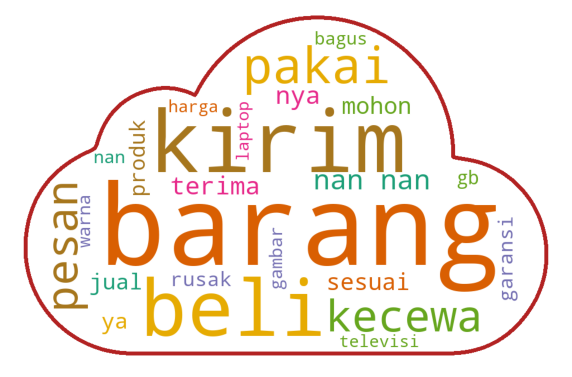

In [204]:
# WordCloud Rating 1 Review 

rating1 = data[data.rating == 1]
normal_string = []

for t in rating1.clean_teks:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

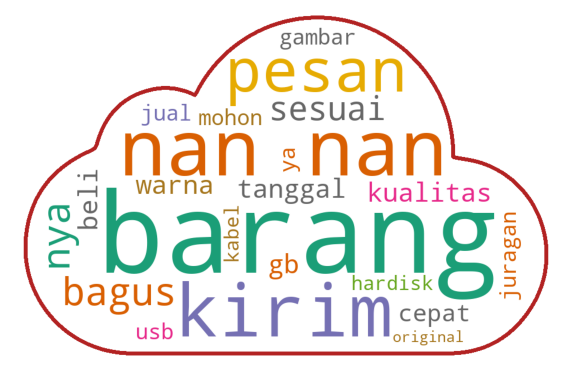

In [205]:
# WordCloud rating 2

rating2 = data[data.rating == 2]
fraud_string = []

for t in rating2.clean_teks:
  fraud_string.append(t)

fraud_string = pd.Series(fraud_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(fraud_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

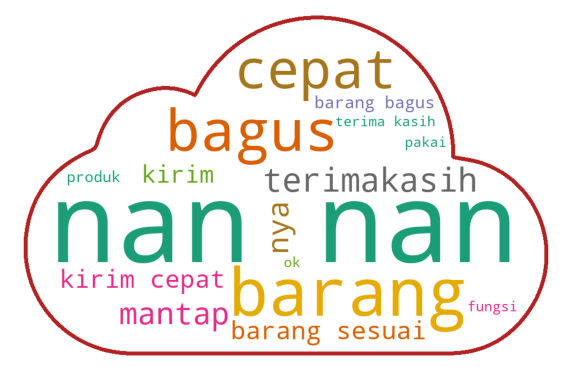

In [206]:
# WordCloud rating 5

rating5 = data[data.rating == 5]
promo_string = []

for t in rating5.clean_teks:
  promo_string.append(t)

promo_string = pd.Series(promo_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(promo_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Isi Resume diisini yah

Resume 
-dalam menentukan akurasi prediksi kaa kata khusunya dalam kasus sentimen analisis diperlukan data dan hyperparameter tuning yg benar, tentunya metode dasar yang memproses serangkaian data juga sangat ber pengaruh terhadap hasil akurasi